### Import TensorFlow and other libraries

In [ ]:
import os, datetime

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from PIL import Image
import matplotlib.pyplot as plt

import pydotplus
import pydot

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
base_dir = "E:/Machine Learning Series/Datasets/archive/real_vs_fake/real-vs-fake/"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

### Image preparation for CNN Image Classifier

In [ ]:
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

validation_generator = valid_datagen.flow_from_directory(valid_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

test_generator = test_datagen.flow_from_directory(test_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


### Visualize the data

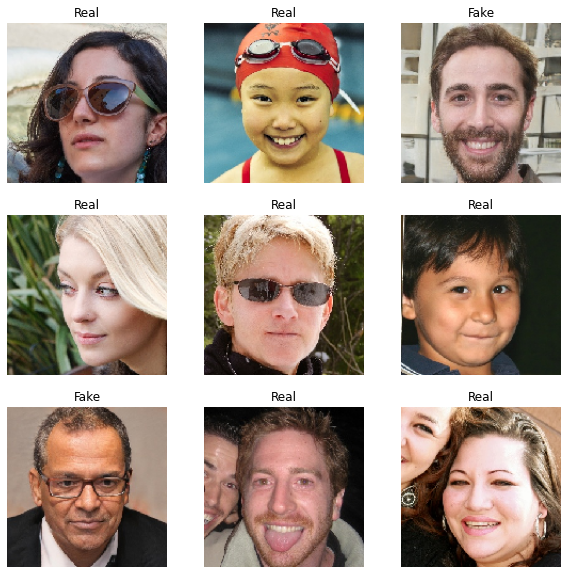

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    img, label = train_generator.next()
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])
    if(label[0] == 0.0):
        plt.title("Fake")
    else:
        plt.title("Real")
    plt.axis("off")

## Model architecture

In [ ]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(1064, activation='relu'),
     tf.keras.layers.Dense(2, activation='softmax')
    ]
)

In [ ]:
# x = tf.keras.layers.Conv2D(16, activation='relu', kernel_size=3, input_shape=(75, 75, 1))(inputs)
# x = tf.keras.layers.AveragePooling2D((2, 2))(x)

# x = tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu')(x)
# x = tf.keras.layers.AveragePooling2D((2, 2))(x)

# x = tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu')(x)
# x = tf.keras.layers.AveragePooling2D((2, 2))(x)

# x = tf.keras.layers.flatten()(x)

## Visualizing network architectures

In [ ]:
tf.keras.utils.pydot = pydot

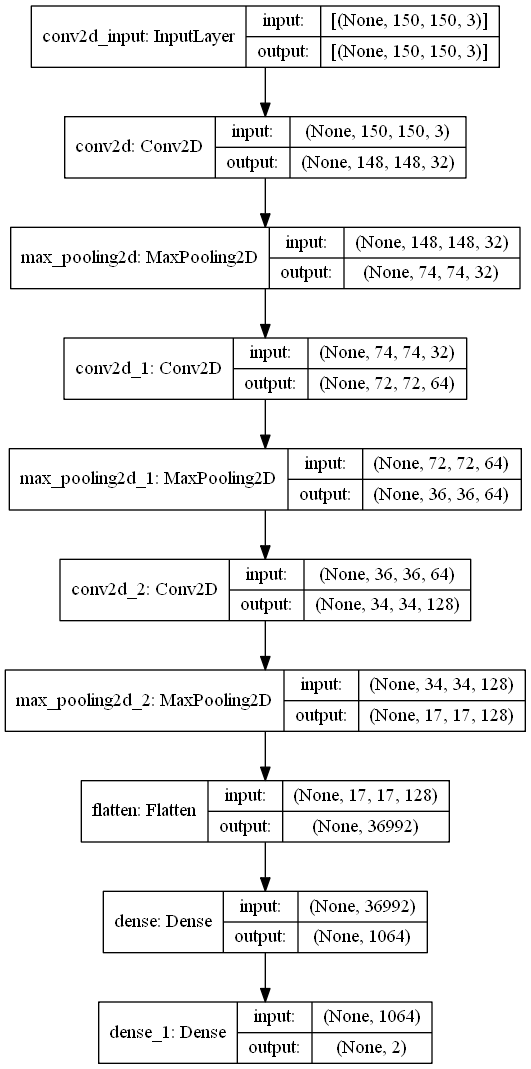

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True)

#### Model summary

View all the layers of the network using the model's summary method:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

#### Compile and train the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
%%time
history = model.fit(train_generator, validation_data = validation_generator, epochs = 10, validation_steps = 50, verbose=1)

Epoch 1/10
1000/1000 [==============================] - 104s 101ms/step - loss: 0.6570 - accuracy: 0.6859 - val_loss: 0.3493 - val_accuracy: 0.8456
Epoch 2/10
1000/1000 [==============================] - 109s 109ms/step - loss: 0.3066 - accuracy: 0.8679 - val_loss: 0.3179 - val_accuracy: 0.8708
Epoch 3/10
1000/1000 [==============================] - 131s 131ms/step - loss: 0.1935 - accuracy: 0.9219 - val_loss: 0.1790 - val_accuracy: 0.9272
Epoch 4/10
1000/1000 [==============================] - 159s 159ms/step - loss: 0.1185 - accuracy: 0.9542 - val_loss: 0.1599 - val_accuracy: 0.9384
Epoch 5/10
1000/1000 [==============================] - 191s 191ms/step - loss: 0.0774 - accuracy: 0.9706 - val_loss: 0.1458 - val_accuracy: 0.9472
Epoch 6/10
1000/1000 [==============================] - 234s 234ms/step - loss: 0.0467 - accuracy: 0.9827 - val_loss: 0.1378 - val_accuracy: 0.9516
Epoch 7/10
1000/1000 [==============================] - 254s 254ms/step - loss: 0.0312 - accuracy: 0.9889 - val_

#### Visualize training results

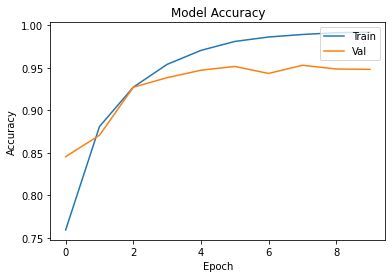

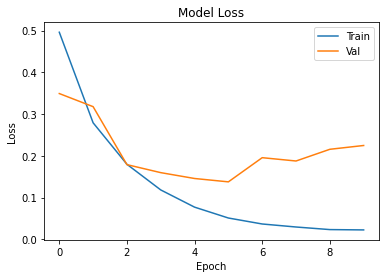

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Evaluate the model on the test data via evaluate():

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)

200/200 [==============================] - 72s 360ms/step - loss: 0.2001 - accuracy: 0.9530


In [ ]:
class_names = ['fake', 'real']

#### Predict on new data

In [ ]:
import numpy as np
from keras.preprocessing import image

# test_image = image.load_img('E:/Machine Learning Series/Datasets/archive/real_vs_fake/real-vs-fake/test/real/00461.jpg', target_size=(150, 150, 3))
test_image = image.load_img('E:/Machine Learning Series/Datasets/archive/real_vs_fake/real-vs-fake/test/fake/0C28G3DC1O.jpg', target_size=(150, 150, 3))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
test_generator.class_indices

print(result)


[[1. 0.]]


In [ ]:
print(
    "This image is {} with a {:.2f} percentage."
    .format(class_names[np.argmax(result)], 100 * np.max(result))
)

This image is fake with a 100.00 percentage.


### Save the entire model

In [ ]:
model.save("E:/Machine Learning Series/Datasets/archive/real_vs_fake/save_model/")

INFO:tensorflow:Assets written to: E:/Machine Learning Series/Datasets/archive/real_vs_fake/save_model/assets


In [ ]:
# model = tf.keras.models.load_model("E:/Machine Learning Series/Datasets/archive/real_vs_fake/save_model/")

In [ ]:
# model.summary()